# Análise - Indústria cinematográfica

## Introdução:

Neste estudo iremos utilizar o dataframe "Worldwide Blockbusters 1977–2017" retirado do Kaggle com a intenção de analisar os dados apresentados e poder tirar conclusões sobre a indústria cinematográfica.

- Pontos importantes
1. Importação e utilização das bibliotecas 'pandas', 'seaborn', 'numpy', 'matplotlib.pyplot' que fornecem ferramentas para análise e manipulação de dados.
2. Como preferência iremos utilizar a biblioteca 'Altair' para visualização estatística dos dados, todavia outras também serão apresentadas ao longo do estudo.

In [191]:
import pandas as pd
import altair as alt


Após a importação, vamos pegar os dados (na extensão .csv) e apresenta-los logo abaixo. Nota-se que foi colocado a representação do 'encoding' para prevenir problemas de formatação devido a acentuação que possa vir a existir, assim como o delimitador em ';'.

In [192]:
filmes = pd.read_csv('blockbusters.csv', encoding='latin-1', sep = ';')
filmes


,Ano de Lancamento,Ranking no ano,Nota IMDB,Classificacao Etaria,Titulo,Orcamento,Duracao em minutos,Estudio,Faturamento Global,Faturamento Domestico,Genero 1,Genero 2,Genero 3
0,2019,1,8.5,PG-13,Avengers: Endgame,"356,000,000",181,Walt Disney,"2,797,800,564","858,373,000",Action,Adventure,Drama
1,2019,2,7.0,PG,The Lion King,"260,000,000",118,Walt Disney,"1,656,943,394","543,638,043",Animation,Adventure,Drama
2,2019,3,7.2,PG,Frozen II,"150,000,000",103,Walt Disney,"1,420,560,456","470,089,732",Animation,Adventure,Comedy
3,2019,4,7.6,PG-13,Spider-Man: Far from Home,"160,000,000",129,Sony Pictures,"1,131,927,996","390,532,085",Action,Adventure,Sci-Fi
4,2019,5,6.9,PG-13,Captain Marvel,"175,000,000",123,Walt Disney,"1,128,274,794","426,829,839",Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,1977,6,6.2,PG,The Deep,"9,000,000",123,Columbia Pictures,"47,346,365","47,346,365",Adventure,Mystery,Thriller
426,1977,7,7.1,PG,The Spy Who Loved Me,"14,000,000",125,United Artists,"46,838,673","46,838,673",Action,Adventure,Thriller
427,1977,8,6.6,PG,"Oh, God!","2,100,000",98,Warner Bros.,"41,687,243","41,687,243",Comedy,Fantasy,NaN
428,1977,9,8.0,PG,Annie Hall,"4,000,000",93,United Artists,"38,251,425","38,251,425",Comedy,Romance,NaN


Nós temos 430 linhas e 13 colunas, nos quais como colunas temos:


In [193]:
filmes.columns

Index(['Ano de Lancamento', 'Ranking no ano', 'Nota IMDB',
       'Classificacao Etaria', 'Titulo', 'Orcamento', 'Duracao em minutos',
       'Estudio', 'Faturamento Global', 'Faturamento Domestico', 'Genero 1',
       'Genero 2', 'Genero 3'],
      dtype='object')

O próximo passo é usar 'to_datetime' para converter a coluna 'Ano de lançamento' para uma data real. Desta forma podemos filtrar como bem desejamos!

In [194]:
#Primeiro criamos uma função entitulada 'extrair_ano' para transformar o dado em data.
def transformar_ano(value):
    return pd.to_datetime(value, format='%Y').year

#Agora criaremos uma nova coluna chamada 'Ano' e aplicaremos a função acima.
filmes['Ano'] = filmes['Ano de Lancamento'].apply(transformar_ano)

filmes.columns
#Como pode ver agora a coluna 'ano' faz parte do Dataframe

Index(['Ano de Lancamento', 'Ranking no ano', 'Nota IMDB',
       'Classificacao Etaria', 'Titulo', 'Orcamento', 'Duracao em minutos',
       'Estudio', 'Faturamento Global', 'Faturamento Domestico', 'Genero 1',
       'Genero 2', 'Genero 3', 'Ano'],
      dtype='object')

Por curiosidade e escolha de qual ano escolher para análise, vamos verificar abaixo a média de contagem de anos do dataframe. 

In [195]:
filmes.mean()

C:\Users\Andre\AppData\Local\Temp/ipykernel_8076/3011383447.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  filmes.mean()


Ano de Lancamento     1998.000000
Ranking no ano           5.500000
Nota IMDB                7.076744
Duracao em minutos     120.602326
Ano                   1998.000000
dtype: float64

Acima é demonstrado a média de todas as colunas, todavia a 'média' das colunas referentes aos anos estão erradas, pois devem medir a contagem dos anos e não o subtotal. Segue abaixo a maneira correta:

In [196]:
filmes['Ano'].value_counts().mean()



10.0

In [197]:
# Caso queira tirar a dúvida ano por ano: 
filmes['Ano'].value_counts()

2019    10
1987    10
1995    10
1994    10
1993    10
1992    10
1991    10
1990    10
1989    10
1988    10
1986    10
1997    10
1985    10
1984    10
1983    10
1982    10
1981    10
1980    10
1979    10
1978    10
1996    10
1998    10
2018    10
2009    10
2017    10
2016    10
2015    10
2014    10
2013    10
2012    10
2011    10
2010    10
2008    10
1999    10
2007    10
2006    10
2005    10
2004    10
2003    10
2002    10
2001    10
2000    10
1977    10
Name: Ano, dtype: int64

Já que a média está em 10, que tal escolhermos o ano de 2019 como exemplo? Por sinal, será necessário a criação de uma váriavel representando este ano em particular e verificaremos posteriormente os dados inclusos nesta pequena amostra(spoiler: 10 linhas e 14 colunas, ou seja, 10 filmes):

In [198]:
filmes_2019 = filmes[filmes['Ano'] == 2019]
filmes_2019.shape


(10, 14)

In [199]:
# Os filmes em questão
filmes_2019

,Ano de Lancamento,Ranking no ano,Nota IMDB,Classificacao Etaria,Titulo,Orcamento,Duracao em minutos,Estudio,Faturamento Global,Faturamento Domestico,Genero 1,Genero 2,Genero 3,Ano
0,2019,1,8.5,PG-13,Avengers: Endgame,"356,000,000",181,Walt Disney,"2,797,800,564","858,373,000",Action,Adventure,Drama,2019
1,2019,2,7.0,PG,The Lion King,"260,000,000",118,Walt Disney,"1,656,943,394","543,638,043",Animation,Adventure,Drama,2019
2,2019,3,7.2,PG,Frozen II,"150,000,000",103,Walt Disney,"1,420,560,456","470,089,732",Animation,Adventure,Comedy,2019
3,2019,4,7.6,PG-13,Spider-Man: Far from Home,"160,000,000",129,Sony Pictures,"1,131,927,996","390,532,085",Action,Adventure,Sci-Fi,2019
4,2019,5,6.9,PG-13,Captain Marvel,"175,000,000",123,Walt Disney,"1,128,274,794","426,829,839",Action,Adventure,Sci-Fi,2019
5,2019,6,7.9,G,Toy Story 4,"200,000,000",100,Walt Disney,"1,073,394,593","434,038,008",Animation,Adventure,Comedy,2019
6,2019,7,8.6,R,Joker,"55,000,000",122,Warner Bros.,"1,071,030,470","334,830,470",Crime,Drama,Thriller,2019
7,2019,8,7.0,PG,Aladdin,"183,000,000",128,Walt Disney,"1,050,693,953","355,559,216",Adventure,Family,Fantasy,2019
8,2019,9,6.9,PG-13,Star Wars: Episode IX - The Rise of Skywalker,"200,000,000",142,Walt Disney,"1,048,859,152","503,458,989",Action,Adventure,Fantasy,2019
9,2019,10,6.5,PG-13,Fast & Furious Presents: Hobbs & Shaw,"200,000,000",137,Universal Pictures,"758,910,100","173,810,100",Action,Adventure,NaN,2019


Com o nossa nossa amostra pronta, podemos começar a criar algumas análises! Para matar nossa curiosidade, o código abaixo criará um gráfico scatterplot sobre a relação entre o orçamento do filme e o faturamento global:

In [200]:
alt.Chart(filmes_2019, title = 'Orçamento x Faturamento Global').mark_point(filled=True).encode(
    alt.X('Orcamento'),
    alt.Y('Faturamento Global'),
    alt.Size('Orcamento'),
    alt.Color('Titulo'),
    alt.OpacityValue(1),
    tooltip = [
        alt.Tooltip('Titulo:N'),
        alt.Tooltip('Orcamento:O'),
        alt.Tooltip('Faturamento Global:O'),
        alt.Tooltip('Faturamento Domestico:O')
        ]
).properties(width=400, height=400).interactive()


alt.Chart(...)

- De acordo com o gráfico o filme com maior Orçamento e Faturamento Global é Avengers:Endgame e em segundo lugar: The Lion King.

Mas qual é o gênero predominante?
 - Primeiro vamos importar as bibliotecas Seaborn, Numpy e Matplotlib para a criação da visualização dos dados. 

In [201]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



E agora vamos com a visualização da contagem utilizando o catplot:

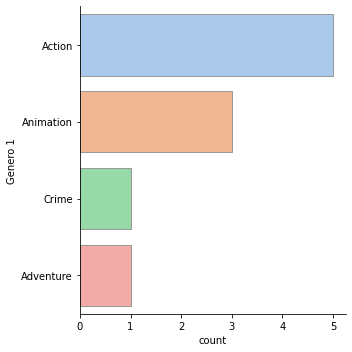

In [202]:
sns.catplot(y = "Genero 1", kind = "count", palette = "pastel", edgecolor = ".6",
            data = filmes_2019)
plt.show()

Como podemos observar o gênero de ação foi o mais predominante em 2019. Agora há alguma correlação entre as variáveis neste Dataframe?


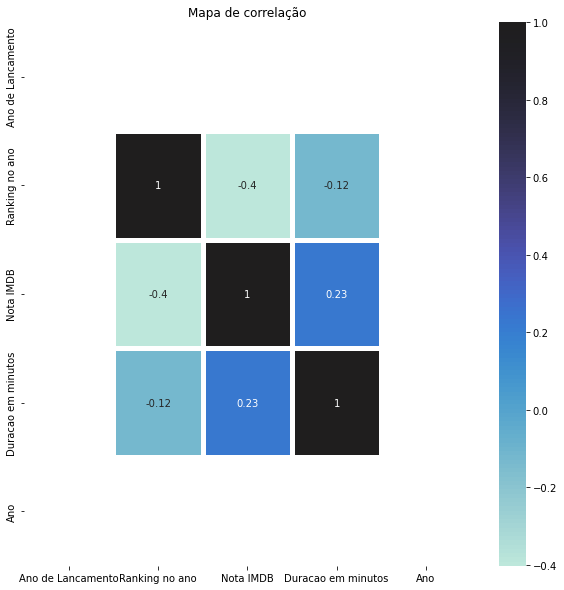

In [203]:
plt.figure(figsize=(10,10))
plt.title('Mapa de correlação')
ax=sns.heatmap(filmes_2019.corr(),
               linewidth=3.1,
               annot=True,
               center=1)

Sim, há correlações! A nota IMDB aumenta de acordo com duração em minutos do filme, todavia ela diminui em relação ao ranking do filme.

Que tal olhar o mesmo resultado, mas de outra forma?

<Figure size 864x864 with 0 Axes>

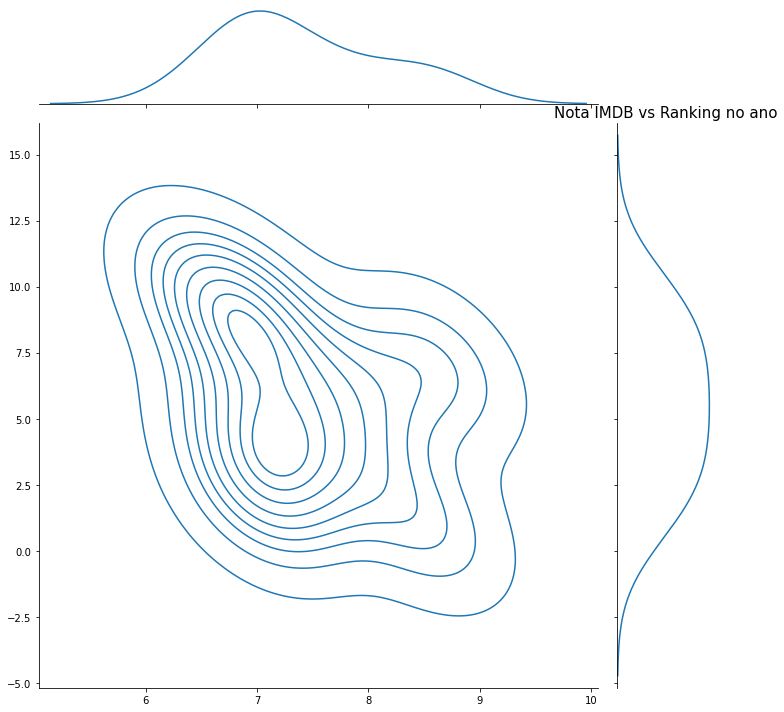

In [204]:
plt.figure(figsize=(12,12))
sns.jointplot(x=filmes_2019['Nota IMDB'].values, y=filmes_2019['Ranking no ano'].values, height=10, kind="kde",)
plt.ylabel('Nota IMDB', fontsize=12)
plt.xlabel("Ranking no ano", fontsize=12)
plt.title("Nota IMDB vs Ranking no ano", fontsize=15)
plt.show()


Desta outra forma podemos visualizar que há uma tendência da nota IMDB(Eixo Y) ser maior de acordo com a menor nota no Ranking(Eixo X).

Outras indagações envolvem o histórico das notas, assim como sua relação com o orçamento.

In [225]:
alt.Chart(filmes_2019, title = 'Nota IMDB x Orçamento').mark_trail().encode(
    x='Nota IMDB:O',
    y='Orcamento:O',
    size='Nota IMDB:Q'
).properties(width=400, height=400)

alt.Chart(...)

É notável o filme fora da curva que foi 'Joker', no qual possui Nota IMDB 8.6 e teve apenas 55 milhões como orçamento. Indo contra a tendência de que quanto maior for a nota, maior será o seu orçamento.

In [251]:
brush = alt.selection(type='interval')

points = alt.Chart(filmes_2019).mark_point().encode(
    x='Orcamento:O',
    y='Faturamento Global:O',
    color=alt.condition(brush, 'Estudio:N', alt.value('lightgray'))
    ).add_selection(
    brush
    ).properties(width=400, height=400)

bars = alt.Chart(filmes_2019).mark_bar().encode(
    y='Estudio:N',
    color='Estudio:N',
    x='count(Estudio):Q'
).transform_filter(
    brush
)

points & bars

alt.VConcatChart(...)

Walt Disney saiu na frente com 7 dos 10 WorldWide blockbusters do ano!

O interessante é a Universal Pictures que com apenas 200 milhões de orçamento faturou 758m com 'Fast & Furious Presents: Hobbs & Shaw' (impulsionado pelo sucesso da franquia?), todavia não chega perto da bola curva que foi 'Joker' da Warner Bros.

Como conclusão, vamos implementar novos elementos na primeira visualização de dados que tivemos, mas dessa vez colocando todos os anos para uma visão mais ampla do setor ao longo da história.

Como faremos isso?
- Criando um slide de linha do tempo(selecionar_ano) para facilitar a visualização e a adição de novas variáveis para um melhor entendimento do filme em questão.

In [293]:
#Slide de linha do tempo

selecionar_ano = alt.selection_single(
    name='Selecionar', fields=['Ano'], init={'Ano': 1977},
    bind=alt.binding_range(min=1977, max=2019, step=1))
   
#Gráfico
 
alt.Chart(filmes, title = 'Orçamento x Faturamento Global').mark_point(filled=True).encode(
alt.X('Orcamento'),
alt.Y('Faturamento Global'),
alt.Size('Faturamento Domestico'),
alt.Color('Titulo'),
alt.OpacityValue(0.8),
tooltip = [
        alt.Tooltip('Titulo:N'),
        alt.Tooltip('Orcamento:O'),
        alt.Tooltip('Faturamento Global:O'),
        alt.Tooltip('Faturamento Domestico:O'),
        alt.Tooltip('Estudio'),
        alt.Tooltip('Genero 1')
        ]
).properties(width=600, height=600).interactive().add_selection(selecionar_ano).transform_filter(selecionar_ano)


alt.Chart(...)